# Supervised Learning with scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from jupyterthemes import jtplot

jtplot.style(theme='chesterish')
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

## Chapter 1. Classification

## 1. Supervised learning

### What is machine learning?

* The art and science of:
    * Giving computers the ability to learn to make decisions from data
    * … without being explicitly programmed!
* Examples:
    * Learning to predict whether an email is spam or not
    * Clustering wikipedia entries into different categories
* Supervised learning: Uses labeled data
* Unsupervised learning: Uses unlabeled data

### Unsupervised learning

* Uncovering hidden patterns from unlabeled data
* Example:
    * Grouping customers into distinct categories (Clustering)

### Reinforcement learning

* Software agents interact with an environment
    * Learn how to optimize their behavior
    * Given a system of rewards and punishments
    * Draws inspiration from behavioral psychology
* Applications
    * Economics
    * Genetics
    * Game playing
* AlphaGo: First computer to defeat the world champion in Go

### Supervised learning

* Predictor variables/features and a target variable
* Aim: Predict the target variable, given the predictor variables
    * Classification: Target variable consists of categories
    * Regression: Target variable is continuous

### Naming conventions

* Features = predictor variables = independent variables
* Target variable = dependent variable = response variable

### Supervised learning

* Automate time-consuming or expensive manual tasks
    * Example: Doctor’s diagnosis
* Make predictions about the future
    * Example: Will a customer click on an ad or not?
* Need labeled data
    * Historical data with labels
    * Experiments to get labeled data
    * Crowd-sourcing labeled data

### Supervised learning in Python

* We will use scikit-learn/sklearn
    * Integrates well with the SciPy stack
* Other libraries
    * TensorFlow
    * keras

### №1 Which of these is a classification problem?

Once you decide to leverage supervised machine learning to solve a new problem, you need to identify whether your problem is better suited to classification or regression. This exercise will help you develop your intuition for distinguishing between the two.

Provided below are 4 example applications of machine learning. Which of them is a supervised classification problem?

* *Using labeled financial data to predict whether the value of a stock will go up or go down next week*
* Using labeled housing price data to predict the price of a new house based on various features
* Using unlabeled data to cluster the students of an online education company into different categories based on their learning styles
* Using labeled financial data to predict what the value of a stock will be next week

## 2. Exploratory data analysis

### The Iris dataset

* Features:
    * Petal length
    * Petal width
    * Sepal length
    * Sepal width
* Target variable: Species
    * Versicolor
    * Virginica
    * Setosa

### The Iris dataset in scikit-learn

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
iris = datasets.load_iris()
type(iris) 

sklearn.utils.Bunch

In [3]:
print(iris.keys()) 

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
type(iris.data), type(iris.target) 

(numpy.ndarray, numpy.ndarray)

In [5]:
iris.data.shape 

(150, 4)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Exploratory data analysis (EDA)

In [7]:
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### Visual EDA

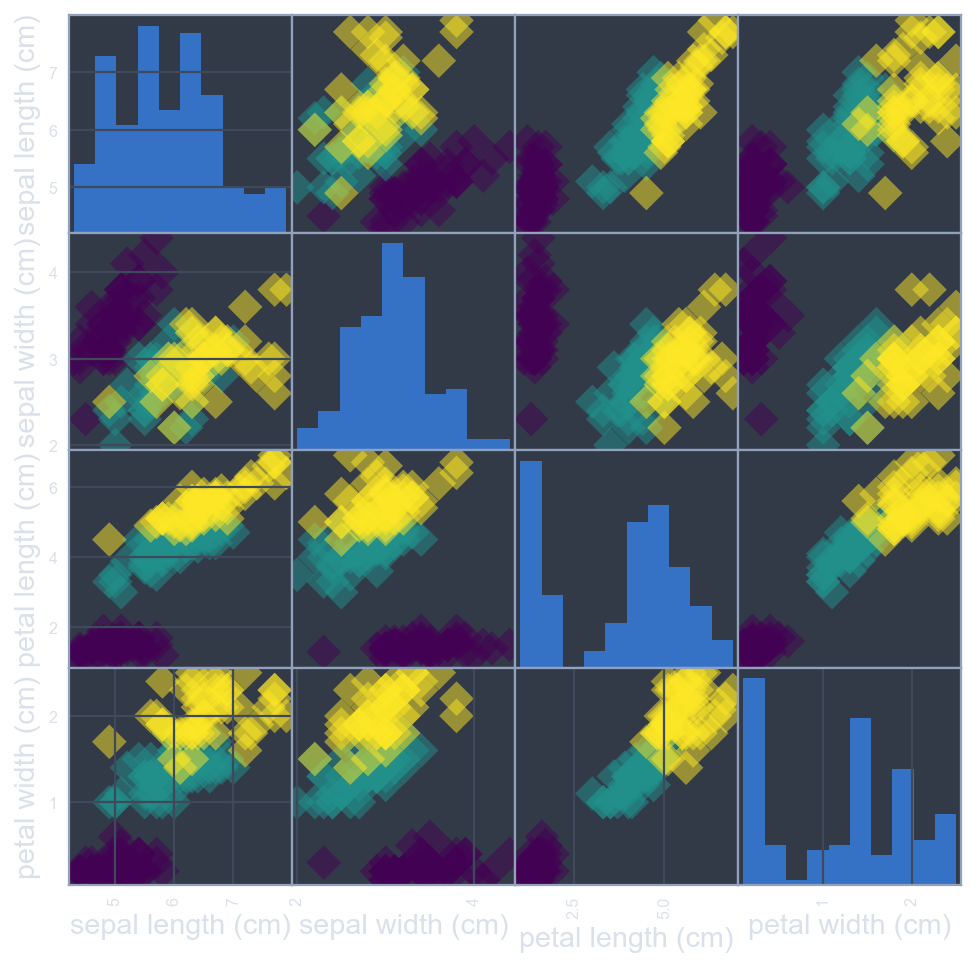

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, c = y, figsize = [8, 8], s=150, marker = 'D')
plt.show()

### №2 Numerical EDA

Use pandas' `.head()`, `.info()`, and `.describe()` methods in the IPython Shell to explore the DataFrame, and select the statement below that is **not** true

* The DataFrame has a total of `435` rows and `17` columns
* Except for `'party'`, all of the columns are of type `int64`
* The first two rows of the DataFrame consist of votes made by Republicans and the next three rows consist of votes made by Democrats
* *There are 17 *predictor variables*, or *features*, in this DataFrame*
* The target variable in this DataFrame is `'party'`

In [9]:
df = pd.read_csv('Supervised_Learning_with_scikit-learn/house-votes-84.csv')
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


###  №3 Visual EDA

Theory:
* Given on the right is a countplot of the 'education' bill, generated from the following code:

```python
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()
```

Exerscise:  
In the IPython Shell, explore the voting behavior further by generating countplots for the `'satellite'` and `'missile'` bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? 

* `'satellite'`
* `'missile'`
* *Both `'satellite'` and `'missile'`*
* Neither `'satellite'` nor `'missile'`

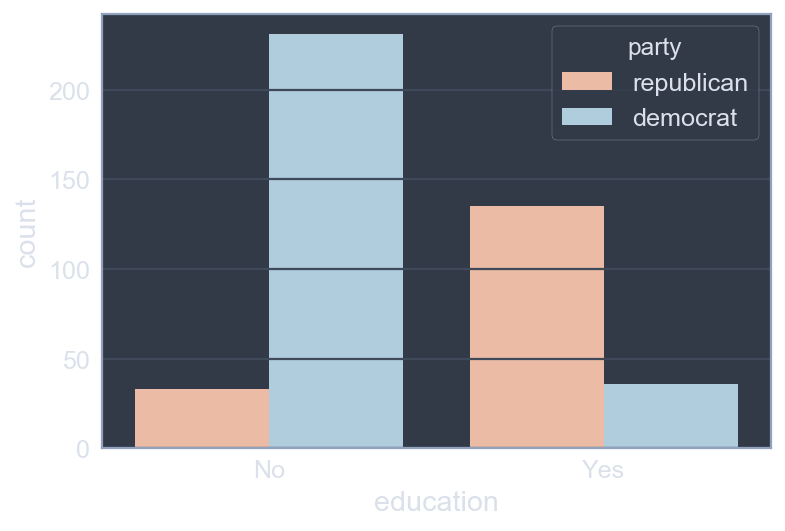

In [10]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

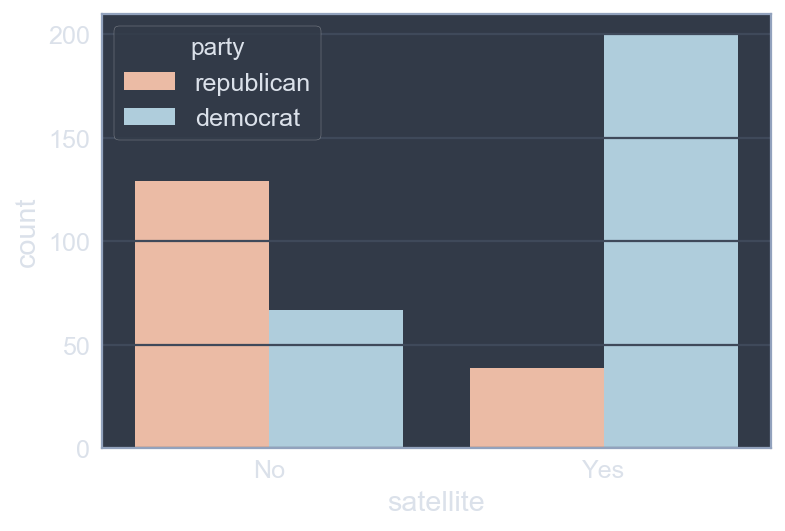

In [11]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

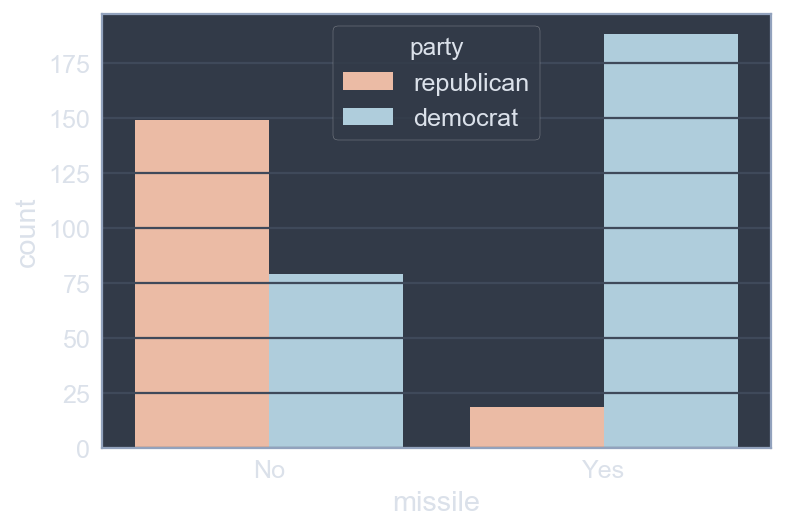

In [12]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

## 3. The classification challenge

### k-Nearest Neighbors

* Basic idea: Predict the label of a data point by
    * Looking at the ‘k’ closest labeled data points
    * Taking a majority vote
    
<img src='Supervised_Learning_with_scikit-learn/Pictures/k-Nearest_Neighbors.png' alt='k-Nearest Neighbors' width=400 align='left'>

### k-NN: Intuition

<img src='Supervised_Learning_with_scikit-learn/Pictures/k-NN_Intuition.png' alt='k-NN: Intuition' width=400 align='left'>

### Scikit-learn fit and predict

* All machine learning models implemented as Python classes
    * They implement the algorithms for learning and predicting
    * Store the information learned from the data
* Training a model on the data = ‘fitting’ a model to the data
    * `.fit()` method
* To predict the labels of new data: `.predict()` method

### Using scikit-learn to fit a classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6) 
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [14]:
iris['data'].shape

(150, 4)

In [15]:
iris['target'].shape

(150,)

### Predicting on unlabeled data

In [16]:
X_new = np.array([[6.5, 2.9, 5.2, 2.3],
                  [7.6, 3.1, 6.1, 2.3],
                  [5.1, 3.3, 1.4, 0.3]])

print(X_new.shape)

(3, 4)


```python
prediction = knn.predict(X_new)
X_new.shape
```

```python
print('Prediction', prediction)
```

### №4 k-Nearest Neighbors: Fit

* Import `KNeighborsClassifier` from `sklearn.neighbors`
* Create arrays `X` and `y` for the features and the target variable. Here this has been done for you. Note the use of `.drop()` to drop the target variable `'party'` from the feature array `X` as well as the use of the `.values` attribute to ensure `X` and `y` are NumPy arrays. Without using `.values`, `X` and `y` are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape
* Instantiate a `KNeighborsClassifier` called `knn` with `6` neighbors by specifying the `n_neighbors` parameter
* Fit the classifier to the data using the `.fit()` method

In [17]:
y = df['party'].values
X = df.drop('party', axis=1).values

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

### №5 k-Nearest Neighbors: Predict

* Create arrays for the features and the target variable from `df`. As a reminder, the target variable is `'party'`
* Instantiate a `KNeighborsClassifier` with `6` neighbors
* Fit the classifier to the data
* Predict the labels of the training data, `X`
* Predict the label of the new data point `X_new`

In [18]:
X_new = pd.DataFrame([[0.67723222, 0.33603553, 0.11911578, 0.33424129, 0.08794558, 0.44908578,
                       0.1997635,  0.16642723, 0.3179499,  0.91571368, 0.62912628,
                       0.2570633,  0.42954848, 0.74129177, 0.5214444,  0.30321064]])

In [19]:
y = df['party']
X = df.drop('party', axis=1).values

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

y_pred = knn.predict(X)

new_prediction = knn.predict(X_new)
print('Prediction: {}'.format(new_prediction))

Prediction: ['democrat']


## 4. Measuring model performance

### Measuring model performance

* In classification, **accuracy** is a commonly used metric
* **Accuracy** = Fraction of correct predictions
* Which data should be used to compute accuracy?
* How well will the model perform on new data?

### Measuring model performance

* Could compute accuracy on data used to fit classifier
    * NOT indicative of ability to generalize
* Split data into training and test set
    * Fit/train the classifier on the training set
    * Make predictions on test set
    * Compare predictions with the known labels

### Train/test split 

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Test set predictions:\n {}'.format(y_pred))

Test set predictions:
 ['democrat' 'republican' 'republican' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'republican' 'republican' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'republican' 'republican' 'republican' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat'

In [21]:
knn.score(X_test, y_test)

0.9541984732824428

### Model complexity

* Larger k = smoother decision boundary = less complex model
* Smaller k = more complex model = can lead to overfitting

<img src='Supervised_Learning_with_scikit-learn/Pictures/Model_complexity.png' alt='Model complexity' width=600 align='left'>

### Model complexity and over/underfitting

<img src='Supervised_Learning_with_scikit-learn/Pictures/over_underfitting.png' alt='Model complexity and over/underfitting' width=500 align='left'>

### №6 The digits recognition dataset

* Import `datasets` from `sklearn` and `matplotlib.pyplot` as `plt`
* Load the digits dataset using the `.load_digits()` method on `datasets`
* Print the keys and `DESCR` of digits
* Print the shape of `images` and `data` keys using the `.` notation
* Display the 1011th image using `plt.imshow()`

In [22]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping b

(1797, 8, 8)
(1797, 64)


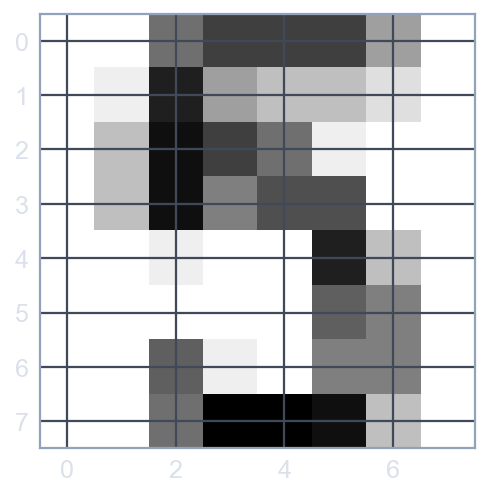

In [23]:
print(digits.images.shape)
print(digits.data.shape)

plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### №7 Train/Test Split + Fit/Predict/Accuracy

* Import `KNeighborsClassifier` from `sklearn.neighbors` and `train_test_split` from `sklearn.model_selection`
* Create an array for the features using `digits.data` and an array for the target using `digits.target`
* Create stratified training and test sets using `0.2` for the size of the test set. Use a random state of `42`. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset
* Create a k-NN classifier with `7` neighbors and fit it to the training data
* Compute and print the accuracy of the classifier's predictions using the `.score()` method

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.9833333333333333


### №8 Overfitting and underfitting

Inside the `for` loop:
* Setup a k-NN classifier with the number of neighbors equal to `k`
* Fit the classifier with `k` neighbors to the training data
* Compute accuracy scores the training set and test set separately using the `.score()` method and assign the results to the `train_accuracy` and `test_accuracy` arrays respectively


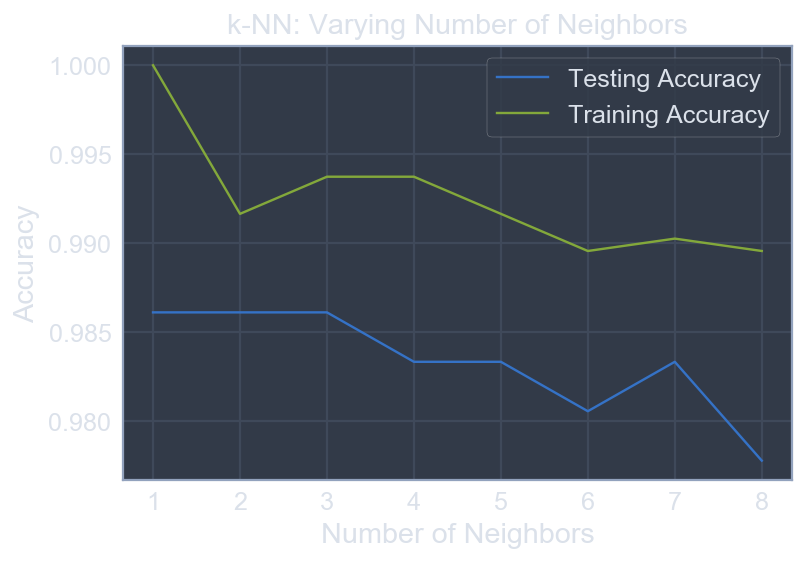

In [25]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Chapter 2. Regression

## 5. Introduction to regression

### Boston housing data

In [26]:
boston = pd.read_csv('Supervised_Learning_with_scikit-learn/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Creating feature and target arrays

In [27]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

### Predicting house value from a single feature

In [28]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [29]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

### Plotting house value vs. number of rooms

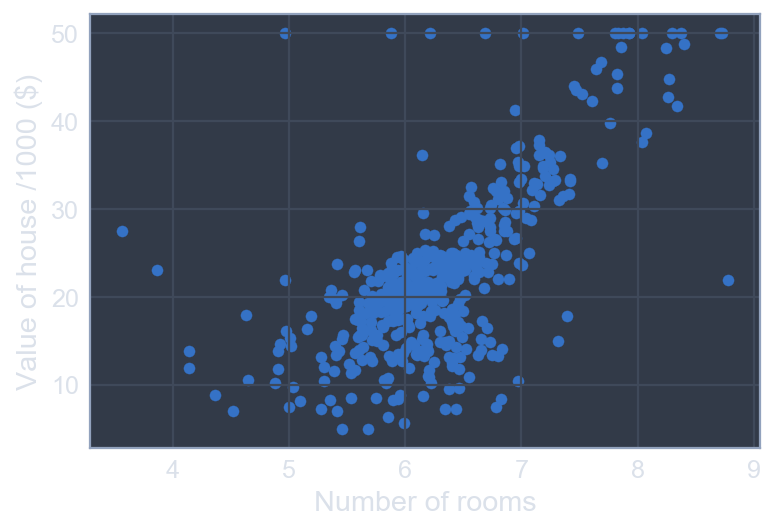

In [30]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

### Fitting a regression model

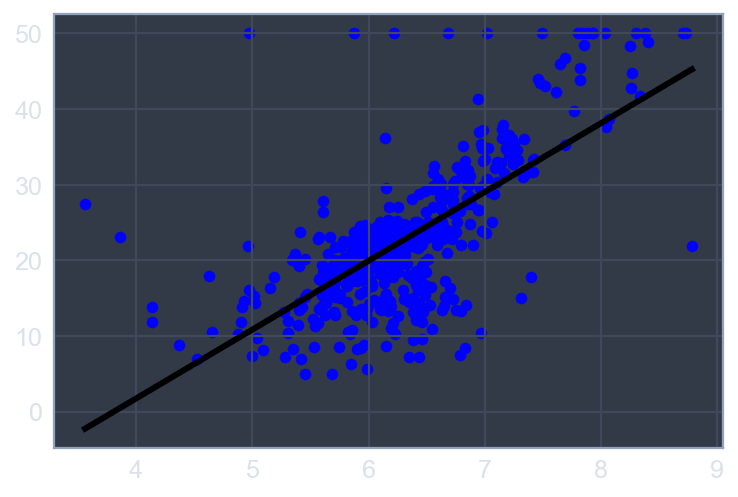

In [31]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

### №9 Which of the following is a regression problem?

Given below are four example applications of machine learning. Your job is to pick the one that is best framed as a regression problem

* *An e-commerce company using labeled customer data to predict whether or not a customer will purchase a particular item*
* A healthcare company using data about cancer tumors (such as their geometric measurements) to predict whether a new tumor is benign or malignant
* A restaurant using review data to ascribe positive or negative sentiment to a given review
* A bike share company using time and weather data to predict the number of bikes being rented at any given hour

### №10 Importing data for supervised learning

* Import `numpy` and `pandas` as their standard aliases
* Read the file `'gapminder.csv'` into a DataFrame `df` using the `read_csv()` function
* Create array `X` for the 'fertility' feature and array y for the 'life' target variable
* Reshape the arrays by using the `.reshape()` method and passing in `-1` and `1`

In [32]:
import numpy as np
import pandas as pd

gapminder = pd.read_csv('Supervised_Learning_with_scikit-learn/gm_2008_region.csv')

y = np.array(gapminder.life)
X = np.array(gapminder.fertility)

print('Dimensions of y before reshaping: {}'.format(y.shape))
print('Dimensions of X before reshaping: {}'.format(X.shape))

y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

print('Dimensions of y after reshaping: {}'.format(y.shape))
print('Dimensions of X after reshaping: {}'.format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


### №11 Exploring the Gapminder data

Once you have a feel for the data, consider the statements below and select the one that is *not* true

* The DataFrame has `139` samples (or rows) and `9` columns
* `life` and `fertility` are negatively correlated
* The mean of `life` is `69.602878`
* `fertility` is of type `int64`
* `GDP` and `life` are positively correlated

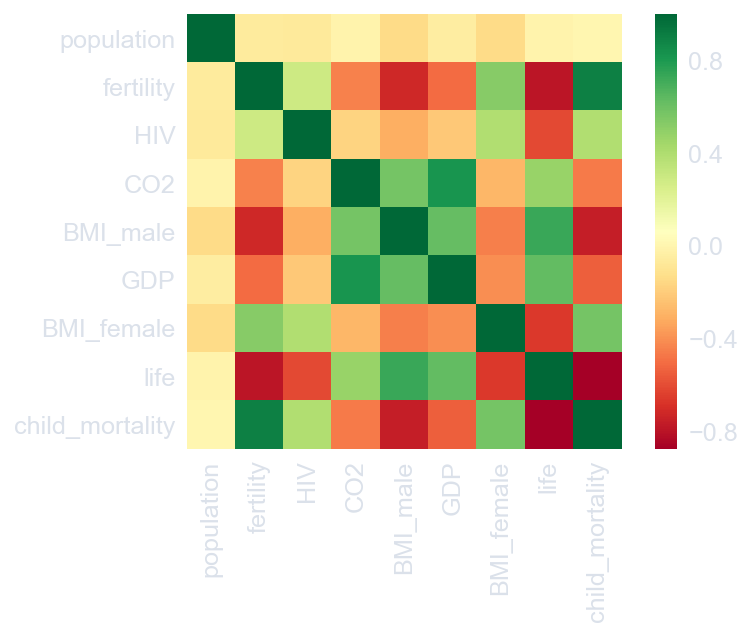

In [33]:
sns.heatmap(gapminder.corr(), square=True, cmap='RdYlGn')
plt.show()

## 6. The basics of linear regression

### Regression mechanics

* y = ax + b
    * y = target
    * x = single feature
    * a, b = parameters of model
* How do we choose a and b?
* Define an error function for any given line
    * Choose the line that minimizes the error function

### The loss function

* Ordinary least squares (OLS): Minimize sum of squares of residuals

<img src='Supervised_Learning_with_scikit-learn/Pictures/The_loss_function.png' alt='The loss function' width=500 align='left'>

### Linear regression in higher dimensions

$ y = a_1x_1 + a_2x_2 + b $
* To fit a linear regression model here:
    * Need to specify 3 variables 
* In higher dimensions:  
    $ y = a_1x_1 + a_2x_2 + a_3x_3 + a_nx_n + b $
    * Must specify coefficient for each feature and the variable b
* Scikit-learn API works exactly the same way:
    * Pass two arrays: Features, and target

### Linear regression on all features

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)

reg_all.score(X_test, y_test)

0.7298987360907498

### №12 Fit & predict for regression

* Import `LinearRegression` from `sklearn.linear_model`
* Create a `LinearRegression` regressor called `reg`
* Set up the prediction space to range from the minimum to the maximum of `X_fertility`
* Fit the regressor to the data (`X_fertility` and `y`) and compute its predictions using the `.predict()` method and the `prediction_space` array
* Compute and print the $R^2$ score using the `.score()` method
* Overlay the plot with your linear regression line

In [35]:
X_fertility = np.array(gapminder.fertility).reshape(-1,1)
y = np.array(gapminder.life).reshape(-1,1)

0.6192442167740035


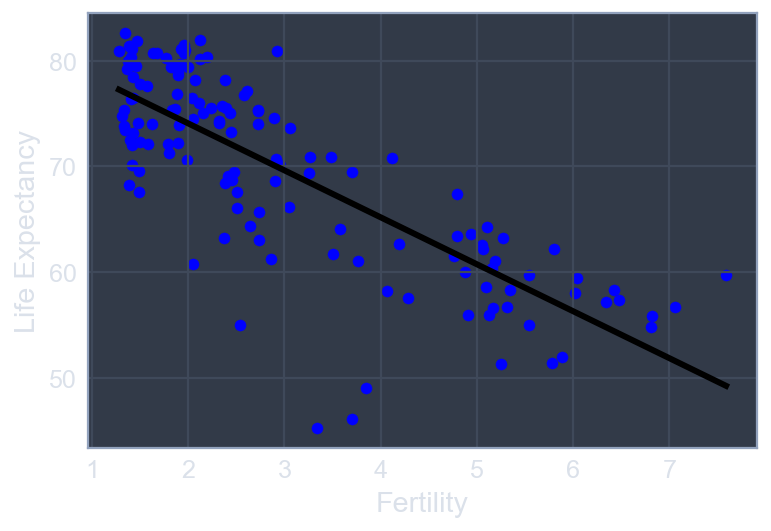

In [36]:
from sklearn.linear_model import LinearRegression

prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

reg = LinearRegression()
reg.fit(X_fertility, y)

y_pred = reg.predict(prediction_space)

print(reg.score(X_fertility, y))

plt.scatter(X_fertility, y, color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

### №13 Train/test split for regression

* Import `LinearRegression` from `sklearn.linear_model`, `mean_squared_error` from `sklearn.metrics`, and `train_test_split` from `sklearn.model_selection`
* Using `X` and `y`, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of `42`
* Create a linear regression regressor called `reg_all`, fit it to the training set, and evaluate it on the test set
* Compute and print the $R^2$ score using the .score() method on the test set
* Compute and print the RMSE. To do this, first compute the Mean Squared Error using the `mean_squared_error()` function with the arguments `y_test` and `y_pred`, and then take its square root using `np.sqrt()`

In [37]:
X = np.array(gapminder.drop(['life', 'Region'] , axis=1))
y = np.array(gapminder['life'])

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

print('R^2: {}'.format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455


## 7. Cross-validation

### Cross-validation motivation

* Model performance is dependent on way the data is split
* Not representative of the model’s ability to generalize
* Solution: Cross-validation!

### Cross-validation basics

<img src='Supervised_Learning_with_scikit-learn/Pictures/Cross-validation_basics.png' alt='Cross-validation basics' width=600 align='left'>

### Cross-validation and model performance

* 5 folds = 5-fold CV
* 10 folds = 10-fold CV
* k folds = k-fold CV
* More folds = More computationally expensive

### Cross-validation in scikit-learn

In [39]:
from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()

cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


In [40]:
np.mean(cv_results) 

0.8599627722793451

### №14 5-fold cross-validation

* Import `LinearRegression` from `sklearn.linear_model` and `cross_val_score` from `sklearn.model_selection`
* Create a linear regression regressor called `reg`
* Use the `cross_val_score()` function to perform 5-fold cross-validation on `X` and `y`
* Compute and print the average cross-validation score. You can use NumPy's `mean()` function to compute the average

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

cv_scores = cross_val_score(reg, X, y, cv=5)
print(cv_scores)

print('Average 5-Fold CV Score: {}'.format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793451


### №15 K-Fold CV comparison

Theory  
* `%timeit cross_val_score(reg, X, y, cv = ____)`

Exercise
* Import `LinearRegression` from `sklearn.linear_model and `cross_val_score` from `sklearn.model_selection`
* Create a linear regression regressor called `reg`
* Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.8718712782622262
0.8436128620131266


## 8. Regularized regression

### Why regularize?

* Recall: Linear regression minimizes a loss function
* It chooses a coefficient for each feature variable
* Large coefficients can lead to overfitting
* Penalizing large coefficients: Regularization

### Ridge regression

* Loss function = OLS loss function + $ \alpha * \sum_{i=1}^n a_i^2 $
* Alpha: Parameter we need to choose
* Picking alpha here is similar to picking k in k-NN
* Hyperparameter tuning (More in Chapter 3)
* Alpha controls model complexity
    * Alpha = 0: We get back OLS (Can lead to overfitting)
    * Very high alpha: Can lead to underfitting

### Ridge regression in scikit-learn

In [43]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.8442469959975749

### Lasso regression

* Loss function = OLS loss function + $ \alpha * \sum_{i=1}^n |a_i| $

### Lasso regression in scikit-learn

In [44]:
from sklearn.linear_model import Lasso 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.8721296169613542

### Lasso regression for feature selection

* Can be used to select important features of a dataset
* Shrinks the coefficients of less important features to exactly 0

### Lasso for feature selection in scikit-learn

In [45]:
X = np.array(boston.drop('MEDV', axis=1))
y = np.array(boston['MEDV'])

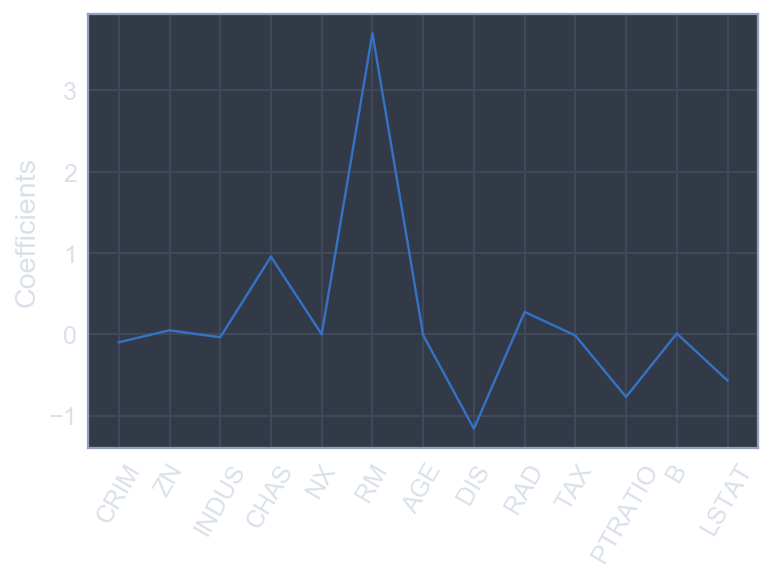

In [46]:
from sklearn.linear_model import Lasso 

names = boston.drop('MEDV', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.show()

### №16 Regularization I: Lasso

* Import `Lasso` from `sklearn.linear_model`
* Instantiate a `Lasso` regressor with an alpha of `0.4` and specify `normalize=True`
* Fit the regressor to the data and compute the coefficients using the `coef_` attribute
* Plot the coefficients on the y-axis and column names on the x-axis

In [47]:
gapminder_columns = gapminder.drop(['life', 'Region'], axis=1).columns

X = np.array(gapminder.drop(['life', 'Region'], axis=1))
y = np.array(gapminder['life'])

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


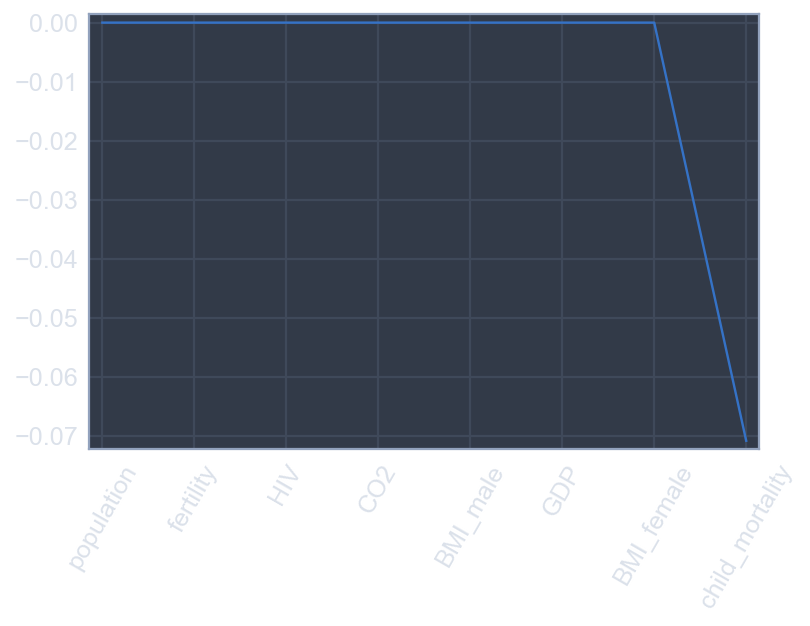

In [48]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X, y)

lasso_coef = lasso.coef_
print(lasso_coef)

plt.plot(range(len(gapminder_columns)), lasso_coef)
plt.xticks(range(len(gapminder_columns)), gapminder_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

### №17 Regularization II: Ridge

* Instantiate a `Ridge` regressor and specify `normalize=True`
* Inside the `for` loop:
    * Specify the alpha value for the regressor to use
    * Perform 10-fold cross-validation on the regressor with the specified alpha. The data is available in the arrays `X` and `y`
    * Append the average and the standard deviation of the computed cross-validated scores. NumPy has been pre-imported for you as `np`
* Use the `display_plot()` function to visualize the scores and standard deviations

In [49]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

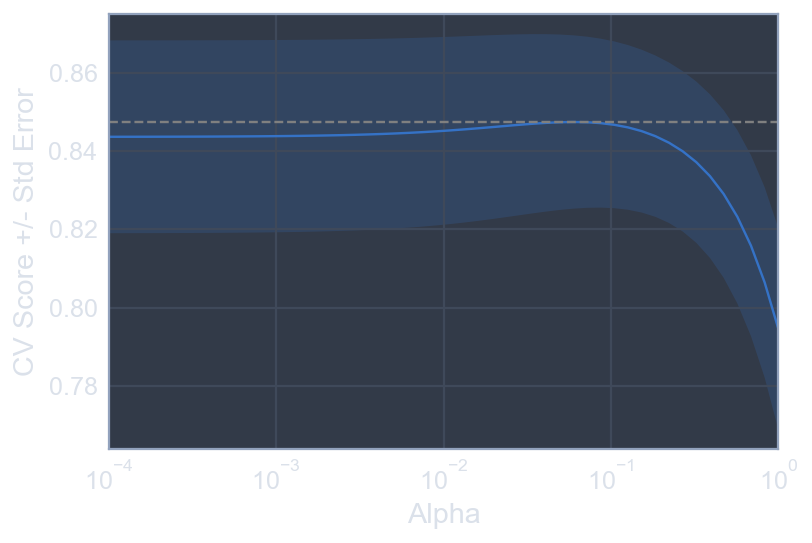

In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

ridge = Ridge(normalize=True)

for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

display_plot(ridge_scores, ridge_scores_std)

## Chapter 3. Fine-tuning your model

## 9. How good is your model?

### Classification metrics

* Measuring model performance with accuracy:
    * Fraction of correctly classified samples
    * Not always a useful metric

### Class imbalance example: Emails

* Spam classification
    * 99% of emails are real; 1% of emails are spam
* Could build a classifier that predicts ALL emails as real
    * 99% accurate!
    * But horrible at actually classifying spam
    * Fails at its original purpose
* Need more nuanced metrics

### Diagnosing classification predictions

* Accuracy: $ \frac{t_p + t_n}{t_p + t_n + f_p + f_n} $
* Confusion matrix

<img src='Supervised_Learning_with_scikit-learn/Pictures/Confusion_matrix.png' alt='Confusion matrix' width=400 align='left'>

### Metrics from the confusion matrix

* Precision: $ \frac{t_p}{t_p + f_p} $  

* Recall: $ \frac{t_p}{t_p + f_n} $  

* F1 score: $ 2 * \frac{precision * recall}{precision + recall} $

* High precision: Not many real emails predicted as spam

* High recall: Predicted most spam emails correctly 

### Confusion matrix in scikit-learn

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = np.array(df.drop('party', axis=1))
y = np.array(df['party'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred)) 

[[108   7]
 [  6  53]]


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.95      0.94      0.94       115
  republican       0.88      0.90      0.89        59

   micro avg       0.93      0.93      0.93       174
   macro avg       0.92      0.92      0.92       174
weighted avg       0.93      0.93      0.93       174



### №18 Metrics for classification

* Import `classification_report` and `confusion_matrix` from `sklearn.metrics`
* Create training and testing sets with 40% of the data used for testing. Use a random state of `42`
* Instantiate a k-NN classifier with `6` neighbors, fit it to the training data, and predict the labels of the test set
* Compute and print the confusion matrix and classification report using the `confusion_matrix()` and `classification_report()` functions

In [53]:
diabetes = pd.read_csv('Supervised_Learning_with_scikit-learn/diabetes.csv')

X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

   micro avg       0.72      0.72      0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



## 10. Logistic regression and the ROC curve

### Logistic regression for binary classification

* Logistic regression outputs probabilities
* If the probability ‘p’ is greater than 0.5:
    * The data is labeled ‘1’
* If the probability ‘p’ is less than 0.5:
    * The data is labeled ‘0’ 

### Linear decision boundary

<img src='Supervised_Learning_with_scikit-learn/Pictures/Linear_decision_boundary.png' alt='Linear decision boundary' width=400 align='left'>

### Logistic regression in scikit-learn

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = np.array(df.drop('party', axis=1))
y = np.array(df['party'].apply(lambda x: 1 if x == 'democrat' else 0))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

### Probability thresholds

* By default, logistic regression threshold = 0.5
* Not specific to logistic regression
    * k-NN classifiers also have thresholds
* What happens if we vary the threshold?

# The ROC curve

<img src='Supervised_Learning_with_scikit-learn/Pictures/The_ROC_curve.png' alt='The ROC curve' width=400 align='left'>

## Plotting the ROC curve

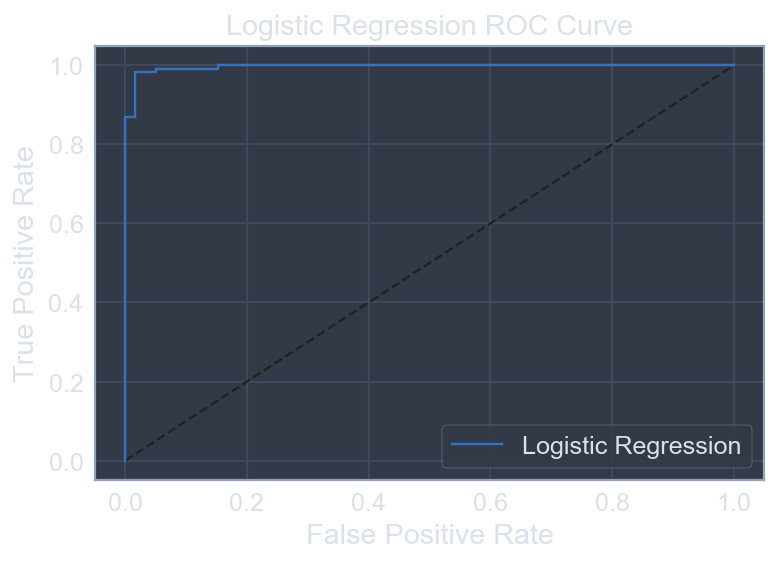

In [56]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower_right')
plt.show()

### №19 Building a logistic regression model

* Import:
    * `LogisticRegression` from `sklearn.linear_model`
    * `confusion_matrix` and `classification_report` from `sklearn.metrics`
* Create training and test sets with 40% (or `0.4`) of the data used for testing. Use a random state of `42`
* Instantiate a `LogisticRegression` classifier called `logreg`
* Fit the classifier to the training data and predict the labels of the test set
* Compute and print the confusion matrix and classification report

In [57]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

   micro avg       0.78      0.78      0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



### №20 Plotting an ROC curve

* Import `roc_curve` from `sklearn.metrics`
* Use the `logreg` classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set `X_test`. Save the result as y_pred_prob`
* Use the `roc_curve()` function with `y_test` and `y_pred_prob` and unpack the result into the variables `fpr`, `tpr`, and `thresholds`
* Plot the ROC curve with `fpr` on the x-axis and `tpr` on the y-axis

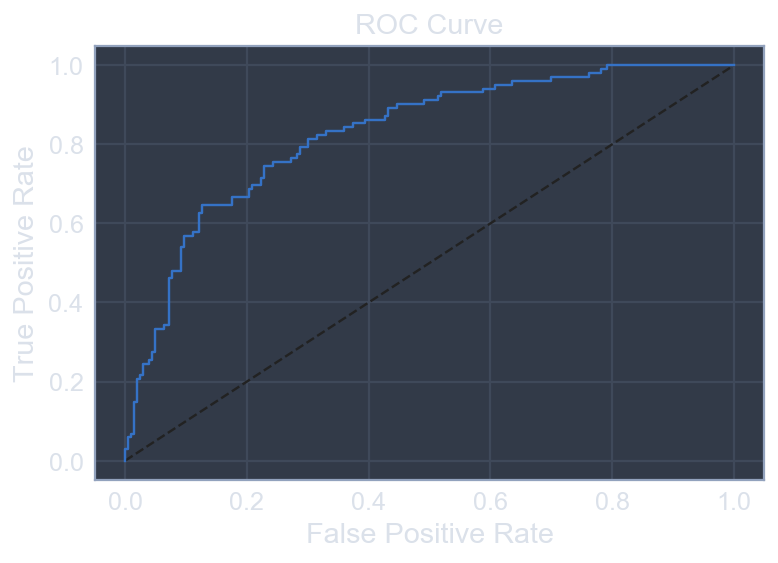

In [59]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### №21 Precision-recall Curve

Theory
* $Precision = \frac{TP}{TP+FP}$
* $Recall = \frac{TP}{TP+FN}$
  
Choose the one statement that is not true. Note that here, the class is positive (1) if the individual has diabetes
* A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes
* Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes
* When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions
* *Precision and recall take true negatives into consideration*

## 11. Area under the ROC curve

### Area under the ROC curve (AUC)

* Larger area under the ROC curve = better model

<img src='Supervised_Learning_with_scikit-learn/Pictures/Area_under_the_ROC_curve.png' alt='Area under the ROC curve' width=400 align='left'>

### AUC in scikit-learn

In [60]:
from sklearn.metrics import roc_auc_score

X = df.drop('party', axis=1)
y = df['party']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.9963154016212233

### AUC using cross-validation

In [61]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print(cv_scores) 

[0.9956427  0.99455338 0.99778024 0.99771298 0.96855346]


### №22 AUC computation

* Import `roc_auc_score` from `sklearn.metrics` and `cross_val_score` from `sklearn.model_selection`
* Using the `logreg` classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set `X_test`. Save the result as `y_pred_prob`
* Compute the AUC score using the `roc_auc_score()` function, the test set labels `y_test`, and the predicted probabilities `y_pred_prob`
* Compute the AUC scores by performing 5-fold cross-validation. Use the `cross_val_score()` function and specify the `scoring` parameter to be `'roc_auc'`

In [62]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

y_pred_prob = logreg.predict_proba(X_test)[:,1]
print('AUC: {}'.format(roc_auc_score(y_test, y_pred_prob)))

cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print('AUC scores computed using 5-fold cross-validation: {}'.format(cv_auc))

AUC: 0.8268608414239482
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80777778 0.81944444 0.86622642 0.85037736]


## 12. Hyperparameter tuning

### Hyperparameter tuning

* Linear regression: Choosing parameters
* Ridge/lasso regression: Choosing alpha
* k-Nearest Neighbors: Choosing n_neighbors
* Parameters like alpha and k: Hyperparameters
* Hyperparameters cannot be learned by fi!ing the model

### Choosing the correct hyperparameter

* Try a bunch of different hyperparameter values
* Fit all of them separately
* See how well each performs
* Choose the best performing one
* It is essential to use cross-validation

### Grid search cross-validation

<img src='Supervised_Learning_with_scikit-learn/Pictures/Grid_search_cross-validation.png' alt='Grid search cross-validation' width=400 align='left'>

### GridSearchCV in scikit-learn

In [64]:
from sklearn.model_selection import GridSearchCV

X = df.drop('party', axis=1)
y = df['party']

param_grid = {'n_neighbors': np.arange(1, 50)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
knn_cv.best_params_

{'n_neighbors': 3}

In [65]:
knn_cv.best_score_

0.9264367816091954

### №23 Hyperparameter tuning with GridSearchCV

* Import `LogisticRegression` from `sklearn.linear_model` and `GridSearchCV` from `sklearn.model_selection`
* Setup the hyperparameter grid by using `c_space` as the grid of values to tune C over
* Instantiate a logistic regression classifier called `logreg`
* Use `GridSearchCV` with 5-fold cross-validation to tune C:
    * Inside `GridSearchCV()`, specify the classifier, parameter grid, and number of folds to use
    * Use the `.fit()` method on the `GridSearchCV` object to fit it to the data `X` and `y`
* Print the best parameter and best score obtained from `GridSearchCV` by accessing the `best_params_` and `best_score_` attributes of `logreg_cv`

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X, y)

print('Tuned Logistic Regression Parameters: {}'.format(logreg_cv.best_params_)) 
print('Best score is {}'.format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.7708333333333334


### №24 Hyperparameter tuning with RandomizedSearchCV

* Import `DecisionTreeClassifier` from `sklearn.tree` and `RandomizedSearchCV` from `sklearn.model_selection`
* Specify the parameters and distributions to sample from
* Instantiate a `DecisionTreeClassifier`
* Use `RandomizedSearchCV` with 5-fold cross-validation to tune the hyperparameters:
    * Inside `RandomizedSearchCV()`, specify the classifier, parameter distribution, and number of folds to use
    * Use the `.fit()` method on the `RandomizedSearchCV` object to fit it to the data `X` and `y`
* Print the best parameter and best score obtained from `RandomizedSearchCV` by accessing the `best_params_` and `best_score_` attributes of `tree_cv`

In [67]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'max_depth': [3, None],
              'max_features': randint(1, 9),
              'min_samples_leaf': randint(1, 9),
              'criterion': ['gini', 'entropy']}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)

print('Tuned Decision Tree Parameters: {}'.format(tree_cv.best_params_))
print('Best score is {}'.format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 7}
Best score is 0.7291666666666666


## 13. Hold-out set for final evaluation

### Hold-out set reasoning

* How well can the model perform on never before seen data?
* Using ALL data for cross-validation is not ideal
* Split data into training and hold-out set at the beginning
* Perform grid search cross-validation on training set
* Choose best hyperparameters and evaluate on hold-out set

### №25 Hold-out set reasoning

For which of the following reasons would you want to use a hold-out set for the very end?

* *You want to maximize the amount of training data used*
* You want to be absolutely certain about your model's ability to generalize to unseen data
* You want to tune the hyperparameters of your model

### №26 Hold-out set in practice I: Classification

* Create the hyperparameter grid:
    * Use the array `c_space` as the grid of values for `'C'`
    * For `'penalty'`, specify a list consisting of `'l1'` and `'l2'`
* Instantiate a logistic regression classifier
* Create training and test sets. Use a `test_size` of 0.4 and `random_state` of `42`. In practice, the test set here will function as the hold-out set
* Tune the hyperparameters on the training set using `GridSearchCV` with 5-folds. This involves first instantiating the `GridSearchCV` object with the correct parameters and then fitting it to the training data
* Print the best parameter and best score obtained from `GridSearchCV` by accessing the `best_params_` and `best_score_` attributes of `logreg_c`

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

print('Tuned Logistic Regression Parameter: {}'.format(logreg_cv.best_params_))
print('Tuned Logistic Regression Accuracy: {}'.format(logreg_cv.best_score_)) 

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### №27 Hold-out set in practice II: Regression

* Import the following modules:
    * `ElasticNet` from `sklearn.linear_model`
    * `mean_squared_error` from `sklearn.metrics`
    * `GridSearchCV` and `train_test_split` from `sklearn.model_selection`
* Create training and test sets, with 40% of the data used for the test set. Use a random state of `42`
* Specify the hyperparameter grid for `'l1_ratio'` using `l1_space` as the grid of values to search over
* Instantiate the `ElasticNet` regressor
* Use GridSearchCV with 5-fold cross-validation to tune `'l1_ratio'` on the training data `X_train` and `y_train`. This involves first instantiating the `GridSearchCV` object with the correct parameters and then fitting it to the training data
* Predict on the test set and compute the R2 and mean squared error

In [69]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

X = gapminder.drop(['Region', 'life'], axis=1)
y = gapminder['life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

elastic_net = ElasticNet()

gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)
gm_cv.fit(X_train, y_train)

y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print('Tuned ElasticNet l1 ratio: {}'.format(gm_cv.best_params_))
print('Tuned ElasticNet R squared: {}'.format(r2))
print('Tuned ElasticNet MSE: {}'.format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.057914133398445


/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Chapter 4. Preprocessing and pipelines

## 14. Preprocessing data

### Dealing with categorical features

* Scikit-learn will not accept categorical features by default
* Need to encode categorical features numerically
* Convert to ‘dummy variables’
    * 0: Observation was NOT that category
    * 1: Observation was that category

### Dummy variables

<img src='Supervised_Learning_with_scikit-learn/Pictures/Dummy_variables.png' alt='Dummy variables' width=500 align='left'>

### Dealing with categorical features in Python

* scikit-learn: `OneHotEncoder()`
* pandas: `get_dummies()`

### Automobile dataset

* mpg: Target Variable
* Origin: Categorical Feature

In [70]:
auto = pd.read_csv('Supervised_Learning_with_scikit-learn/auto.csv')
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


### EDA w/ categorical feature

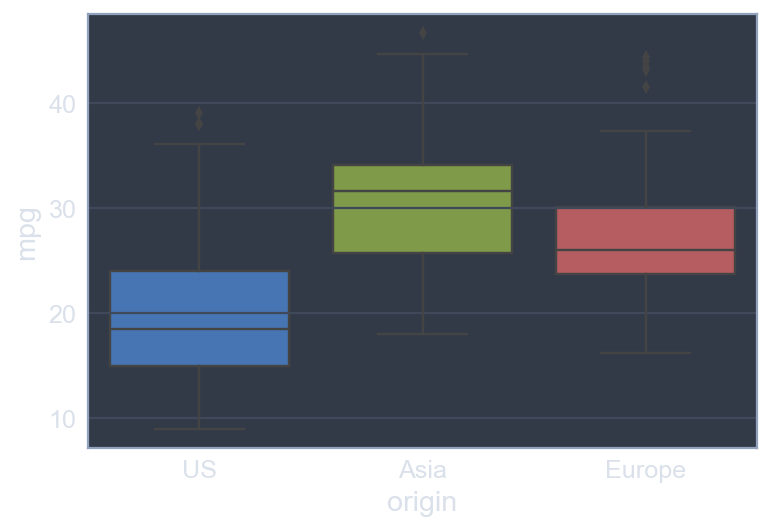

In [71]:
sns.boxplot(x='origin', y='mpg', data=auto)
plt.show()

### Encoding dummy variables

In [72]:
auto_origin = pd.get_dummies(auto)
auto_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [73]:
auto_origin = auto_origin.drop('origin_Asia', axis=1)
auto_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


### Linear regression with dummy variables

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X = auto_origin.drop('mpg', axis=1)
y = auto_origin['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)
ridge.score(X_test, y_test)

0.7190645190217895

### №28 Exploring categorical features

* Import `pandas` as `pd`
* Read the CSV file `'gapminder.csv'` into a DataFrame called `df`
* Use pandas to create a boxplot showing the variation of life expectancy (`'life'`) by region (`'Region'`). To do so, pass the column names in to `df.boxplot()` (in that order)

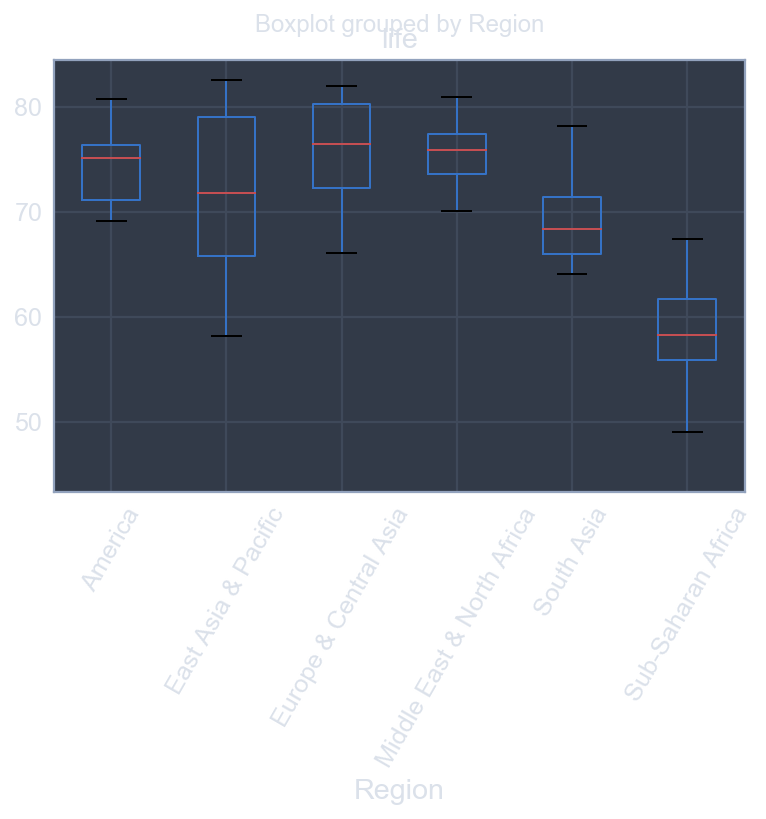

In [75]:
gapminder.boxplot('life', 'Region', rot=60)
plt.show()

### №29 Creating dummy variables

* Use the pandas `get_dummies()` function to create dummy variables from the `df` DataFrame. Store the result as `df_region`
* Print the columns of `df_region`
* Use the `get_dummies()` function again, this time specifying `drop_first=True` to drop the unneeded dummy variable (in this case, `'Region_America'`)
* Print the new columns of `df_region` and take note of how one column was dropped!

In [76]:
gapminder_region = pd.get_dummies(gapminder)
print(gapminder_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')


In [77]:
gapminder_region = pd.get_dummies(gapminder, drop_first=True)
print(gapminder_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


### №30 Regression with categorical features

* Import `Ridge` from `sklearn.linear_model` and `cross_val_score` from `sklearn.model_selection`
* Instantiate a ridge regressor called ridge with `alpha=0.5` and `normalize=True`
* Perform 5-fold cross-validation on `X` and `y` using the `cross_val_score()` function
* Print the cross-validated scores

In [78]:
X = gapminder_region.drop('life', axis=1)
y = gapminder_region['life']

In [79]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=.5, normalize=True)

ridge_cv = cross_val_score(ridge, X, y, cv=5)
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


## 15. Handling missing data

### PIMA Indians dataset

In [80]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### PIMA Indians dataset

In [81]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Dropping missing data

In [82]:
diabetes.insulin.replace(0, np.nan, inplace=True)
diabetes.triceps.replace(0, np.nan, inplace=True)
diabetes.bmi.replace(0, np.nan, inplace=True)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


### Dropping missing data

In [83]:
diabetes = diabetes.dropna()
diabetes.shape 

(393, 9)

### Imputing missing data

* Making an educated guess about the missing values
* Example: Using the mean of the non-missing entries

In [84]:
from sklearn.preprocessing import Imputer

X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)

X = imp.transform(X)

/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Imputing within a pipeline

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
logreg = LogisticRegression()

steps = [('imputation', imp),
         ('logistic_regression', logreg)]

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Imputing within a pipeline

In [86]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

0.7966101694915254

### №31 Dropping missing data

* Explore the DataFrame `df` in the IPython Shell. Notice how the missing value is represented
* Convert all `'?'` data points to `np.nan`
* Count the total number of NaNs using the `.isnull()` and `.sum()` methods
* Drop the rows with missing values from `df` using `.dropna()`
* See how many rows were lost by dropping the missing values

In [87]:
df = pd.read_csv('Supervised_Learning_with_scikit-learn/house-votes-84.csv')

df[df == '?'] = np.nan
print(df.isnull().sum())

print('Shape of Original DataFrame: {}'.format(df.shape))

df = df.dropna()
print('Shape of DataFrame After Dropping All Rows with Missing Values: {}'.format(df.shape))

party                0
infants              0
water                0
budget               0
physician            0
salvador             0
religious            0
satellite            0
aid                  0
missile              0
immigration          0
synfuels             0
education            0
superfund            0
crime                0
duty_free_exports    0
eaa_rsa              0
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (435, 17)


### №32 Imputing missing data in a ML Pipeline I

* Import `Imputer` from `sklearn.preprocessing` and `SVC` from `sklearn.svm`. SVC stands for Support Vector Classification, which is a type of SVM
* Setup the Imputation transformer to impute missing data (represented as `'NaN'`) with the `'most_frequent`' value in the column (`axis=0`)
* Instantiate a `SVC` classifier. Store the result in `clf`
* Create the steps of the pipeline by creating a list of tuples:
    * The first tuple should consist of the imputation step, using `imp`
    * The second should consist of the classifier

In [88]:
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

clf = SVC()

steps = [('imputation', imp),
        ('SVM', clf)]

/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### №33 Imputing missing data in a ML Pipeline II

* Import the following modules:
    * Imputer from `sklearn.preprocessing` and `Pipeline` from `sklearn.pipeline`
    * `SVC` from `sklearn.svm`
* Create the pipeline using `Pipeline()` and `steps`
* Create training and test sets. Use 30% of the data for testing and a random state of `42`
* Fit the pipeline to the training set and predict the labels of the test set
* Compute the classification report

In [89]:
df = pd.read_csv('Supervised_Learning_with_scikit-learn/house-votes-84.csv')

X = df.drop('party', axis=1)
y = df['party']

In [90]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

steps = [('imputation3', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.99      0.96      0.98        85
  republican       0.94      0.98      0.96        46

   micro avg       0.97      0.97      0.97       131
   macro avg       0.96      0.97      0.97       131
weighted avg       0.97      0.97      0.97       131



/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## 16. Centering and scaling

### Why scale your data?

In [91]:
red_wine = pd.read_csv('Supervised_Learning_with_scikit-learn/winequality-red.csv')  
red_wine.describe()

,fixed acidity,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


### Why scale your data?

* Many models use some form of distance to inform them
* Features on larger scales can unduly influence the model
* Example: k-NN uses distance explicitly when making predictions
* We want features to be on a similar scale
* Normalizing (or scaling and centering)

### Ways to normalize your data

* Standardization: Subtract the mean and divide by variance
    * All features are centered around zero and have variance one
* Can also subtract the minimum and divide by the range
    * Minimum zero and maximum one
* Can also normalize so the data ranges from -1 to +1
* See scikit-learn docs for further details

### Scaling in scikit-learn

In [92]:
from sklearn.preprocessing import scale

X = red_wine.drop('quality', axis=1).values
y = red_wine['quality'].values

X_scaled = scale(X)

np.mean(X), np.std(X)

(12.29304904315197, 19.77975029339097)

In [93]:
np.mean(X_scaled), np.std(X_scaled)

(3.9345518415448055e-15, 1.0)

### Scaling in a pipeline

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
knn_scaled = pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.73125

In [95]:
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
knn_unscaled.score(X_test, y_test)

0.659375

### CV and scaling in a pipeline

In [96]:
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

parameters = {'knn__n_neighbors': np.arange(1, 50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

### Scaling and CV in a pipeline

In [97]:
cv.best_params_

{'knn__n_neighbors': 19}

In [98]:
cv.score(X_test, y_test)

0.75625

In [99]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.73      0.72      0.73       144\n           1       0.78      0.78      0.78       176\n\n   micro avg       0.76      0.76      0.76       320\n   macro avg       0.75      0.75      0.75       320\nweighted avg       0.76      0.76      0.76       320\n'

### №34 Centering and scaling your data

* Import `scale` from `sklearn.preprocessing`
* Scale the features `X` using `scale()`
* Print the mean and standard deviation of the unscaled features `X`, and then the scaled features `X_scaled`. Use the numpy functions `np.mean()` and `np.std()` to compute the mean and standard deviations

In [100]:
white_wine = pd.read_csv('Supervised_Learning_with_scikit-learn/white-wine.csv')

X = white_wine.drop('quality', axis=1).values
y = white_wine['quality'].values

In [101]:
from sklearn.preprocessing import scale

X_scaled = scale(X)

print('Mean of Unscaled Features: {}'.format(np.mean(X))) 
print('Standard Deviation of Unscaled Features: {}'.format(np.std(X)))

print('Mean of Scaled Features: {}'.format(np.mean(X_scaled))) 
print('Standard Deviation of Scaled Features: {}'.format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.739937614267761e-15
Standard Deviation of Scaled Features: 0.9999999999999999


### №35 Centering and scaling in a pipeline

* Import the following modules:
    * `StandardScaler` from `sklearn.preprocessing`
    * `Pipeline` from `sklearn.pipeline`
* Complete the `steps` of the pipeline with `StandardScaler()` for `'scaler'` and `KNeighborsClassifier()` for `'knn'`
* Create the `pipeline` using `Pipeline()` and `steps`
* Create training and test sets, with 30% used for testing. Use a random state of `42`
* Fit the pipeline to the training set
* Compute the accuracy scores of the scaled and unscaled models by using the `.score()` method inside the provided `print()` functions

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

knn_scaled = pipeline.fit(X_train, y_train)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.964625850340136
Accuracy without Scaling: 0.9666666666666667


### №36 Bringing it all together I: Pipeline for classification

* Setup the pipeline with the following steps:
    * Scaling, called `'scaler'` with `StandardScaler()`
    * Classification, called `'SVM'` with `SVC()`
* Specify the hyperparameter space using the following notation: `'step_name__parameter_name'`. Here, the `step_name` is `SVM`, and the `parameter_names` are `C` and `gamma`
* Create training and test sets, with 20% of the data used for the test set. Use a random state of `21`
* Instantiate `GridSearchCV` with the pipeline and hyperparameter space and fit it to the training set. Use 3-fold cross-validation (This is the default, so you don't have to specify it)
* Predict the labels of the test set and compute the metrics

In [103]:
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=21)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print('Accuracy: {}'.format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print('Tuned Model Parameters: {}'.format(cv.best_params_))

Accuracy: 0.9693877551020408
              precision    recall  f1-score   support

           0       0.43      0.10      0.17        29
           1       0.97      1.00      0.98       951

   micro avg       0.97      0.97      0.97       980
   macro avg       0.70      0.55      0.58       980
weighted avg       0.96      0.97      0.96       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


### №37 Bringing it all together II: Pipeline for regression

* Set up a pipeline with the following steps:
    * `'imputation'`, which uses the `Imputer()` transformer and the `'mean'` strategy to impute missing data (`'NaN'`) using the mean of the column
    * `'scaler'`, which scales the features using `StandardScaler()`
    * `'elasticnet'`, which instantiates an `ElasticNet()` regressor
* Specify the hyperparameter space for the l1 ratio using the following notation: `'step_name__parameter_name'`. Here, the `step_name` is elasticnet, and the `parameter_name` is `l1_ratio`
* Create training and test sets, with 40% of the data used for the test set. Use a random state of `42`
* Instantiate `GridSearchCV` with the pipeline and hyperparameter space. Use 3-fold cross-validation (This is the default, so you don't have to specify it)
* Fit the `GridSearchCV` object to the training set
* Compute $R^2$ and the best parameters

In [104]:
X = gapminder.drop(['life', 'Region'], axis=1)
y = gapminder['life']

steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

pipeline = Pipeline(steps)

parameters = {'elasticnet__l1_ratio': np.linspace(0,1,30)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

gm_cv = GridSearchCV(pipeline, param_grid=parameters)
gm_cv.fit(X_train, y_train)

r2 = gm_cv.score(X_test, y_test)

print('Tuned ElasticNet Alpha: {}'.format(gm_cv.best_params_))
print('Tuned ElasticNet R squared: {}'.format(r2))

/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklear

/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklear

/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklear

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888216


/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
